In [1]:
import pandas as pd

# Step 0

In [2]:
df = pd.read_excel('/Users/nickfitzhugh/Vijays project/SampleFileForNick.xlsm')
df = df.iloc[:,:6]
n = df.iloc[-1].GraphID # count of graphs
GraphID_List = list(range(1,n+1))

# Step 1

In [3]:
df = df.iloc[:,:6]
df.head()

,GraphID,From,To,Prod,CostPerUnit,MaxFlow
0,1,S1,M1,P1,1,9999
1,1,S2,M1,P1,1,9999
2,1,S3,M1,P1,1,9999
3,1,S1,M2,P1,1,9999
4,1,S2,M2,P1,1,0


In [4]:
df['H'] = df['From'] + '-' + df['Prod']
df['I'] = df['To'] + '-' + df['Prod']
Node_Table = pd.concat([df['H'],df['I']])
Node_Table.drop_duplicates(inplace = True, ignore_index = True)
Node_Names = list(Node_Table)
Node_Table = Node_Table.to_frame().reset_index().rename(columns={'index': 'NodeID', 0: 'Node_Name'})
Node_Table.NodeID += 1

# Step 2

In [5]:
Node_Table.head()

,NodeID,Node_Name
0,1,S1-P1
1,2,S2-P1
2,3,S3-P1
3,4,M1-P1
4,5,M2-P1


In [6]:
graphID_col = [1]*len(Node_Table)
temp_table = pd.DataFrame({'Node_ID_copy':Node_Table['NodeID'],'GraphID':[1]*len(Node_Table)})
Node_Table = pd.concat([temp_table,Node_Table], axis = 1)

In [8]:
import numpy as np

In [9]:
with open('node_file_1.txt', 'w') as file:
    for graph in GraphID_List:
        values = Node_Table.values
        np.savetxt(file, values, delimiter=" ",fmt='%s')
        Node_Table['GraphID'] += 1

# Step 3

In [10]:
Edge_All = df[df.MaxFlow > 0][['GraphID','H', 'I']].copy()
Edge_All.rename(columns={'H': 'ANN_Source', 'I':'ANN_Sink'}, inplace=True)
Edge_All['Edge_Name'] = Edge_All.ANN_Source + Edge_All.ANN_Sink
e_name = Edge_All.Edge_Name
Edge_All.insert(loc=0, column='edge_name_copy', value = e_name)
Edge_All.head()

,edge_name_copy,GraphID,ANN_Source,ANN_Sink,Edge_Name
0,S1-P1M1-P1,1,S1-P1,M1-P1,S1-P1M1-P1
1,S2-P1M1-P1,1,S2-P1,M1-P1,S2-P1M1-P1
2,S3-P1M1-P1,1,S3-P1,M1-P1,S3-P1M1-P1
3,S1-P1M2-P1,1,S1-P1,M2-P1,S1-P1M2-P1
5,S3-P1M2-P1,1,S3-P1,M2-P1,S3-P1M2-P1


# Step 4

In [11]:
with open('edge_file.txt', 'w') as edge_file:
    np.savetxt(edge_file, Edge_All.values, delimiter= ' ', fmt = '%s')

# Testing

In [41]:
import numpy as np
import pandas as pd

In [73]:
def script(file_name):
    df = pd.read_excel(file_name)

    # Step 0
    n = df.iloc[-1].GraphID
    GraphID_List = list(range(1,n+1))

    # Step 1
    df = df.iloc[:,:6]
    df['From']= df['From'].astype(str)
    df['To']= df['To'].astype(str)
    df['H'] = df['From'] + '-' + df['Prod']
    df['I'] = df['To'] + '-' + df['Prod']

    Node_Table = pd.concat([df['H'],df['I']])
    Node_Table.drop_duplicates(inplace = True, ignore_index = True)
    Node_Table = Node_Table.to_frame().reset_index().rename(columns={'index': 'NodeID', 0: 'Node_Name'})
    Node_Table.NodeID += 1

    # Step 2
    graphID_col = [1]*len(Node_Table)
    temp_table = pd.DataFrame({'Node_ID_copy':Node_Table['NodeID'],'GraphID':[1]*len(Node_Table)})
    Node_Table = pd.concat([temp_table,Node_Table], axis = 1)

    with open('node_file_1.txt', 'w') as file:
        for graph in GraphID_List:
            values = Node_Table.values
            np.savetxt(file, values, delimiter=" ",fmt='%s')
            Node_Table['GraphID'] += 1

    # Step 3
    Edge_All = df[df.MaxFlow > 0][['H', 'I']].copy()
    Edge_All.rename(columns={'H': 'ANN_Source', 'I':'ANN_Sink'}, inplace=True)
    Edge_All['Edge_Name'] = Edge_All.ANN_Source + Edge_All.ANN_Sink
    e_name = Edge_All.Edge_Name
    Edge_All.insert(loc=0, column='edge_name_copy', value = e_name)

    # Step 4
    with open('edge_file.txt', 'w') as edge_file:
        np.savetxt(edge_file, Edge_All.values, delimiter= ' ', fmt = '%s')


In [86]:
files = ['1_graph_sample.xlsm', '10_graph_sample.xlsm', '100_graph_sample.xlsm', '1000_graph_sample.xlsm']
g_times = {}
for i in range(len(files)):
    res = %timeit -o script(files[i])
    g_times[10**i] = res.average

33.8 ms ± 9.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
70.5 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
364 ms ± 75.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.47 s ± 352 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
import matplotlib.pyplot as plt

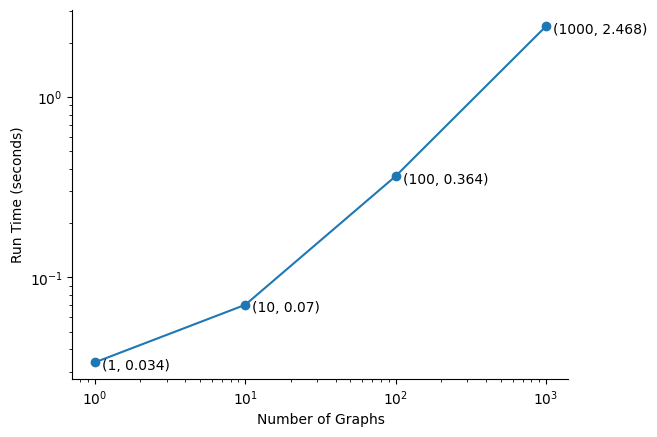

In [87]:
lists = sorted(g_times.items())
num_graphs, run_time = zip(*lists)

plt.plot(num_graphs, run_time, marker='o')
plt.yscale('log')
plt.xscale('log')
plt.gca().spines[['top', 'right']].set_visible(False)

for i, (xi, yi) in enumerate(zip(num_graphs, run_time)):
    plt.annotate(f'({xi}, {round(yi, 3)})', (xi, yi), textcoords="offset fontsize", xytext=(.5, -.5))

plt.ylabel('Run Time (seconds)')
plt.xlabel('Number of Graphs')

plt.show()

presumption here is that there is some O(1) task that takes roughly 30ms, and the rest of the script is O(n), which comes to dominate with larger n.

In [80]:
files = ['4_node_sample.xlsm', '16_node_sample.xlsm', '64_node_sample.xlsm', '256_node_sample.xlsm', '1024_node_sample.xlsm']
n_times = {}
for i in range(len(files)):
    res = %timeit -o script(files[i])
    n_times[4**i] = res.average

28.9 ms ± 8.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.7 ms ± 4.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
28.9 ms ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
57.6 ms ± 5.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
235 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


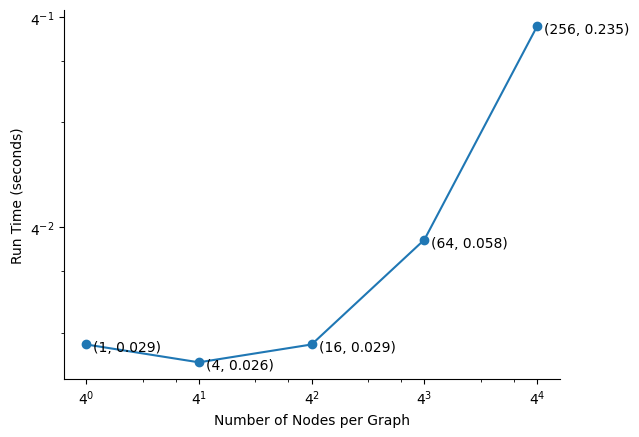

In [90]:
lists = sorted(n_times.items())
num_nodes, run_time = zip(*lists)

plt.plot(num_nodes, run_time, marker='o')
plt.yscale('log', base = 4)
plt.xscale('log', base = 4)
plt.gca().spines[['top', 'right']].set_visible(False)

for i, (xi, yi) in enumerate(zip(num_nodes, run_time)):
    plt.annotate(f'({xi}, {round(yi, 3)})', (xi, yi), textcoords="offset fontsize", xytext=(.5, -.5))

plt.ylabel('Run Time (seconds)')
plt.xlabel('Number of Nodes per Graph')

plt.show()

the time complexity with respect to the number of nodes per graph is n*log(n) because pandas's drop_duplicates() method sorts the elements before checking for duplicates, and that sorting algorithm's time complexity is n*log(n). There are ways to remove duplicates in O(n) time, and that may be worth testing depending on the size of the final data set; however this operation is performed once regardless of graph or node count and it is still fairly efficient (only takes 0.235 seconds in the worst case).